In [ ]:
values = [5, 5, 3, 1, 1, 2, 1, 2, 1, 3, 3, 4, 5, 5]

In [2]:
hist = {}
for x in values:
    hist[x] = hist.get(x, 0)+1  # hist에 x가 없으면 0으로 반환됨
print(hist)

{5: 4, 3: 3, 1: 4, 2: 2, 4: 1}


In [3]:
# collections -> Counter
from collections import Counter
count_values = Counter(values)  # values 내의 개수를 count해줌
count_values

Counter({5: 4, 3: 3, 1: 4, 2: 2, 4: 1})

In [4]:
# itertools -> groupby
# 1. groupby -> 정렬된 상태로 사용해야 하고
# 2. 값이 아니라 iterator type을 반환해줌

In [5]:
from itertools import groupby
{key : len(list(group)) for key, group in groupby(sorted(values))}

{1: 4, 2: 2, 3: 3, 4: 1, 5: 4}

In [8]:
values_2 = ["a", "a", "a", "b","b", "b", "b", "b"]
for key, group in groupby(sorted(values_2)):
    print(key, list(group))

a ['a', 'a', 'a']
b ['b', 'b', 'b', 'b', 'b']


In [12]:
import numpy as np
hist = {key: val for key, val in enumerate(np.bincount(values))}

In [14]:
np.bincount(values) # 몇 개씩 들어가있는지 세어주는 bincount
# 0은 0개, 1은 4개, 2는 3개, ... index와 같은 숫자 위치에 각 값이 몇 개 존재하는지 count해줌

array([0, 4, 2, 3, 1, 4, 0, 0, 0, 0, 2])

In [15]:
for a in enumerate(np.bincount(values)):    # enumerate는 앞에 순서를 붙여준다고 생각하면 됨
    print(a)

(0, 0)
(1, 4)
(2, 2)
(3, 3)
(4, 1)
(5, 4)
(6, 0)
(7, 0)
(8, 0)
(9, 0)
(10, 2)


In [24]:
# 속도 테스트
import random   # random number generator
import time # 시간 모듈

long_values = [random.uniform(1, 10) for _ in range(10000000)]
start = time.time()
hist = {}

for x in long_values:
    hist[x] = hist.get(x, 0)+1
print("For loop:", time.time() - start)

start = time.time()
count_values = Counter(long_values)
print("collections.Counter : ", time.time()-start)

start = time.time()
hist = {key : len(list(group)) for key, group in groupby(sorted(long_values))}
print("itertools.groupby : ", time.time() - start)

sorted_long_values = sorted(long_values)
start = time.time()
hist = {key:len(list(group)) for key, group in groupby(sorted(sorted_long_values))}
print("itertools.groupby sorted values : ", time.time() - start)

start = time.time()
hist = {key : val for key, val in enumerate(np.bincount(long_values))}
print("numpy bincount : ", time.time() - start)

For loop: 5.958250999450684
collections.Counter :  4.309382677078247
itertools.groupby :  15.160515308380127
itertools.groupby sorted values :  11.198809385299683
numpy bincount :  0.9498746395111084


In [21]:
# pypy -> interpreter python interpreter -> 엄청 빠름. 단, pure python일 때.
# c 들어간 코드는 pypy 엄청 느림(numpy, pandas,,,)

In [25]:
hist

{0: 0,
 1: 1109703,
 2: 1110031,
 3: 1111553,
 4: 1112153,
 5: 1110478,
 6: 1111117,
 7: 1111704,
 8: 1112591,
 9: 1110670}

In [26]:
# dict iteration keys, values, items
for key in sorted(hist.keys()):
    print(key, hist[key])

0 0
1 1109703
2 1110031
3 1111553
4 1112153
5 1110478
6 1111117
7 1111704
8 1112591
9 1110670


In [27]:
for key, values in sorted(hist.items()):
    print(key, values)

0 0
1 1109703
2 1110031
3 1111553
4 1112153
5 1110478
6 1111117
7 1111704
8 1112591
9 1110670


In [28]:
# bincount에서 0 없애기

start = time.time()
hist = {key : val for key, val in enumerate(np.bincount(long_values)) if val != 0}
print("numpy.bincount : ", time.time() - start)

numpy.bincount :  0.6137242317199707


In [29]:
hist

{1: 1109703,
 2: 1110031,
 3: 1111553,
 4: 1112153,
 5: 1110478,
 6: 1111117,
 7: 1111704,
 8: 1112591,
 9: 1110670}

In [30]:
values = [5, 5, 3, 1, 1, 2, 1, 2, 1, 3, 3, 4, 5, 5]
hist = {}
for x in values:
    hist[x] = hist.get(x, 0)+1  # hist에 x가 없으면 0으로 반환됨
print(hist)

{5: 4, 3: 3, 1: 4, 2: 2, 4: 1}


In [34]:
from matplotlib import pyplot as plt

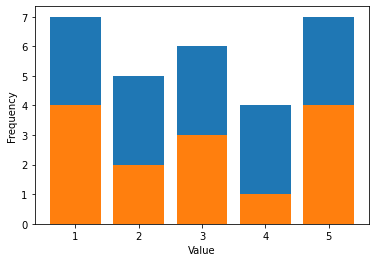

In [36]:
plt.bar(list(hist.keys()), [x + 3 for x in list(hist.values())])
plt.xlabel("Value")
plt.ylabel("Frequency")
# plt.show()
# plt.close()

plt.bar(list(hist.keys()), list(hist.values()))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()
plt.close()

(array([4., 0., 2., 0., 0., 3., 0., 1., 0., 4.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

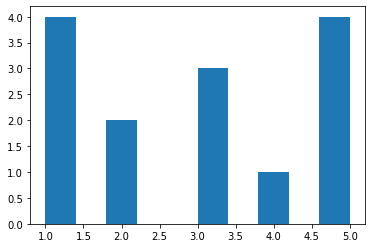

In [37]:
plt.hist(values)    # 알아서 히스토그램 그려줌

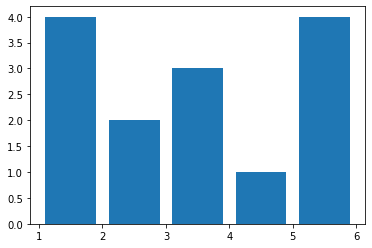

In [40]:
plt.hist(values, bins = range(1, 7), rwidth = 0.8)
plt.show()
plt.close()

In [41]:
import pandas as pd
preg = pd.read_csv("./2002FemPreg.tsv", sep="\t")
live = preg[preg.outcome == 1]  # preg.outcome == 1 : 생존해서 정상 출산된 아이들

In [43]:
live

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13581,12568,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,2734.687353,4258.980140,7772.212858,2,28,NaN,6.3750
13584,12569,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,2580.967613,2925.167116,5075.164946,2,61,NaN,6.3750
13588,12571,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,6.1875
13591,12571,4,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4670.540953,5795.692880,6269.200989,1,78,NaN,7.5000


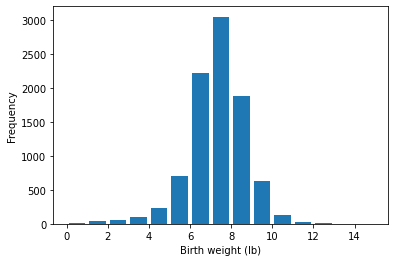

In [47]:
plt.hist(live["birthwgt_lb"], 
            bins = range(int(live["birthwgt_lb"].min()), int(live["birthwgt_lb"].max() + 1)),
            rwidth = 0.8    # 바의 너비
        )
plt.xlabel("Birth weight (lb)")
plt.ylabel("Frequency")
plt.show()
plt.close()

In [50]:
np.floor(live["agepreg"]) # barplot count하기 위해 내림 처리

0        33.0
1        39.0
2        14.0
3        17.0
4        18.0
         ... 
13581    30.0
13584    26.0
13588    17.0
13591    21.0
13592    21.0
Name: agepreg, Length: 9148, dtype: float64

In [52]:
hist = {key : val for key, val in enumerate(np.bincount(np.floor(live["agepreg"]))) if val != 0}
hist

{10: 2,
 11: 1,
 12: 1,
 13: 14,
 14: 43,
 15: 128,
 16: 242,
 17: 398,
 18: 546,
 19: 559,
 20: 638,
 21: 646,
 22: 557,
 23: 593,
 24: 561,
 25: 512,
 26: 517,
 27: 489,
 28: 449,
 29: 395,
 30: 396,
 31: 339,
 32: 279,
 33: 220,
 34: 175,
 35: 138,
 36: 99,
 37: 83,
 38: 55,
 39: 34,
 40: 21,
 41: 14,
 42: 2,
 43: 1,
 44: 1}

<AxesSubplot:ylabel='Frequency'>

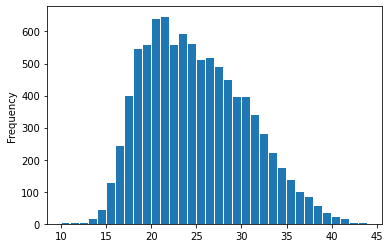

In [58]:
live["agepreg"].plot.hist(rwidth=0.8, bins = range(int(live["agepreg"].min()), int(live["agepreg"].max() + 1)))

<BarContainer object of 35 artists>

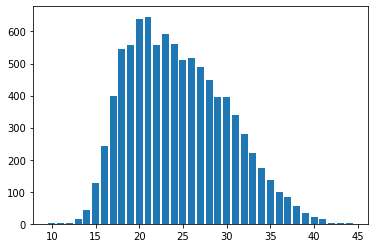

In [62]:
plt.bar(hist.keys(), hist.values())

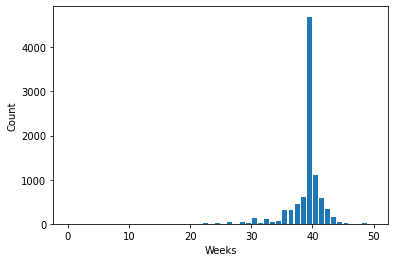

In [64]:
live["prglngth"].plot.hist(rwidth=0.8, bins = range(int(live["prglngth"].min()), int(live["prglngth"].max() + 1)))

plt.xlabel("Weeks")
plt.ylabel("Count")
plt.show()

In [66]:
live.groupby("prglngth").count()["caseid"].sort_index()[0:10]

prglngth
0     1
4     1
9     1
13    1
17    2
18    1
19    1
20    1
21    2
22    7
Name: caseid, dtype: int64

In [67]:
live.groupby("prglngth").count()["caseid"].sort_index(ascending=False)[0:10]

prglngth
50       2
48       7
47       1
46       1
45      10
44      46
43     148
42     328
41     587
40    1116
Name: caseid, dtype: int64

In [68]:
firsts = live[live["birthord"] == 1]
others = live[live["birthord"] > 1]

<AxesSubplot:ylabel='Frequency'>

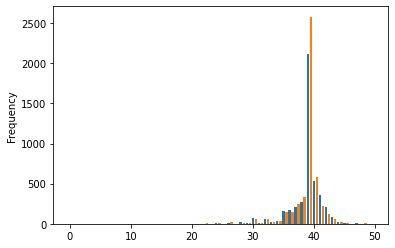

In [73]:
firsts["prglngth"].plot.hist(rwidth=0.4, bins = range(int(firsts["prglngth"].min()), int(firsts["prglngth"].max() + 1)), align="left")
others["prglngth"].plot.hist(rwidth=0.4, bins = range(int(others["prglngth"].min()), int(others["prglngth"].max() + 1)), align="mid")

In [74]:
len(firsts)
len(others)

4735

In [76]:
mean = firsts["prglngth"].mean()
median = firsts["prglngth"].median()
var = firsts["prglngth"].var()
std = firsts["prglngth"].std()
print(mean, median, var, std)

38.60095173351461 39.0 7.794713509229203 2.7919014146687204


In [78]:
firsts["prglngth"].mean() - others["prglngth"].mean()

0.07803726677754952

In [83]:
# cohen effect size
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pool_var = (n1 * var1 + n2 * var2) / (n1+n2)
    d = diff / (pool_var ** 0.5)
    return d

In [84]:
print(CohenEffectSize(firsts["prglngth"], others["prglngth"]))

0.028879044654449834


In [85]:
firsts["prglngth"].mode()

0    39
dtype: int64

In [87]:
firsts.prglngth.value_counts()[firsts["prglngth"].mode()]

39    2114
Name: prglngth, dtype: int64

In [88]:
plt.rcParams['figure.facecolor'] = 'white'

<AxesSubplot:ylabel='prglngth'>

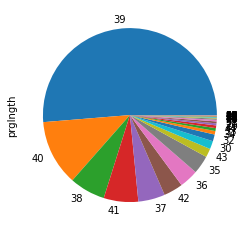

In [89]:
live["prglngth"].value_counts().plot.pie()